In [17]:
import numpy as np

## 1. The Adjacency Matrix

In this notebook we will explore some properties and uses of the adjacency matrix of an undirected graph $G=(V,E)$.

To begin, fill out the adjacency matrix of the below graph:

<img src="UndirectedGraph.png" style="width: 250px;"/>

In [18]:
#TO DO: Fill out the adjacency matrix:
A = np.array([[0, 1, 0, 0, 1, 0],
             [1, 0, 1, 0, 1, 0],
             [0, 1, 0, 1, 0, 0],
             [0, 0, 1, 0, 1, 1],
             [1, 1, 0, 1, 0, 0],
             [0, 0, 0, 1, 0, 0]])

### Symmetry of the Adjacency Matrix

It is a fact (that you will show in the homework) that the adjacency matrix of any undirected graph is symmetric.

Let's verify that this is true for the above graph:

In [19]:
np.prod(A.T == A) == True

True

## 2.1. Length of the shortest path between vertices 1 and 6

We will see in the homework that a path $p$ of length $n$ exists between vertices $i$ and $j$ in an undirected graph $G$ if and only if $e_i^\top A^n e_j$ is nonzero, where $A$ is the adjacency matrix of $G$ and $e_i$ signifies the standard basis vector that is $1$ at index $i$ and $0$ elsewhere ($e_j$ defined similarly).

This fact can be directly applied to find the shortest path between two vertices $i$ and $j$. Just loop through increasing values for $n\in\mathbb{N}$ until you find the first $n$ such that $e_i^\top A^n e_j\neq 0$. This $n$ is the length of the shortest path.

In [20]:
e1 = np.array([1,0,0,0,0,0]).T
e6 = np.array([0,0,0,0,0,1]).T

In [23]:
B = A
for i in range(10):
    print(i+1)
#     print(B)
    print(e1.T @ B)
    if (e1.T @ B @ e6)!=0:
        print("Length of the shortest path between 1 and 6 is: " + str(i+1))
        print("Value of e1.T A^" + str(i+1) + " e6: " + str(e1.T @ B @ e6))
        break
    B = B @ A

1
[0 1 0 0 1 0]
2
[2 1 1 1 1 0]
3
[2 4 2 2 4 1]
Length of the shortest path between 1 and 6 is: 3
Value of e1.T A^3 e6: 1


## 2.2. Length of the mats, such as PDF. ... Primarily, the nbconvert tool allows you to convert a Jupyter .ipynb notebook document file into ...
Missing: rename ‎| Must include: renameshortest path using eigen-decomposition of A

You may have noticed that the above method uses one matrix multiplication per iteration of $n$, which can be expensive. We can instead use the eigen-decompostiion of $A$ to avoid this.

That is, we use $A=P\Lambda P^\top$ where the columns of $P$ are the eigenvectors of $A$ and $\Lambda$ is the diagonal matrix of $A$'s eigenvalues. (Note: we can always do this because $A$ is symmetric). Then, instead of calculating $A^n$ directly, we instead do
$$A^n=(P\Lambda P^\top)^n=P\Lambda^n P^\top.$$

Now, instead of multiplying an arbitrary matrix $A$, which in general takes time $O(n^{2.38})$, we multiply the diagonal matrix $\Lambda$, which takes only $O(n)$ time.

In [9]:
values, vectors = np.linalg.eig(A)
for i in range(10):
    B = vectors @ np.diag(values**(i+1)) @ vectors.T
    if (e1.T @ B @ e6)> 0.1:
        print("Lenght of the shortest path between 1 and 6 is: " + str(i+1))
        print("Value of e1.T A^" + str(i+1) + " e6: " + str(e1.T @ B @ e6))
        break

Lenght of the shortest path between 1 and 6 is: 3
Value of e1.T A^3 e6: 0.9999999999999987


# Wave-front of Breadth-First Search

We can also use the adjacency matrix $A$ to perform breadth-first search.

Let $v_t$ represent the nodes visited after $t$ steps of breadth-first search, where $(v_t)_j\neq 0$ if and only if node $j$ was visited at the $t$-th step. We start with $v_0=e_i$ where $i$ is the starting node of the BFS.

Notice that in general, $Av$ is nonzero in exactly the indices corresponding to vertices adjacent to those with nonzero indices in $v$ (convince yourself of this). That is, multiplication by $A$ performs exactly the function of taking the next step in the BFS, i.e. $v_{t+1}=Av_t$.

In other words, $A^ne_i$ is a vector that is nonzero at exactly the nodes a distance of $n$ from node $i$.

In [9]:
m = 50
n = m**2
A = np.zeros((n, n))

for k in range(n):
    A[k][k]= 1
    i = k%m
    j = k//m
    if i+1<m:
        A[k][i+1 + m*j] = 1
    if i>0:
        A[k][i-1 + m*j] = 1
    if j+1<m:
        A[k][i + m*(j+1)] = 1
    if j>0:
        A[k][i + m*(j-1)] = 1

# add obstables
for i in range((int) (2*np.sqrt(m))):
    for j in range((int) (np.sqrt(m))):
        A[:, ((int) ((m+1) * np.sqrt(m))) + (i + m*j)] = np.zeros(n)
        
for i in range((int) (np.sqrt(m))):
    for j in range((int) (2*np.sqrt(m))):
        A[:, ((int) (1.35 * m * np.sqrt(m) * np.sqrt(np.sqrt(m)))) + (i + m*j)] = np.zeros(n)

<IPython.core.display.Javascript object>


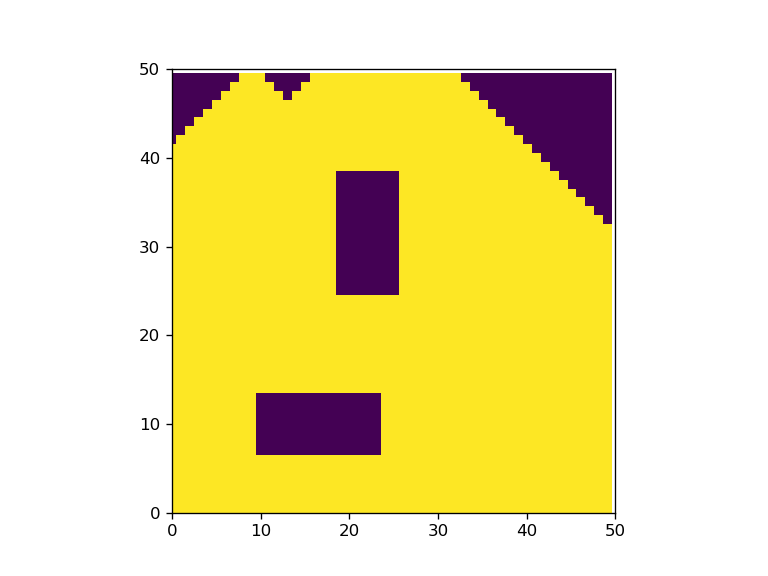

In [10]:
%matplotlib notebook

nb_frame = 100
e1 = np.zeros((n,nb_frame))
e1[320][0] = 1

for i in range(nb_frame):
    if i == 0:
        continue
    e1[:,i] = e1[:,i-1].T @ A

import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes(xlim=(0, m), ylim=(0, m))

im=plt.imshow((e1[:,1].T).reshape(m,m), interpolation='nearest')

# animation function.  This is called sequentially
def animate(i):
    im.set_array((e1[:,i].T >= 1).reshape(m,m))
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=nb_frame)

plt.show()